In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import hashlib

### CSV 파일 로드

In [4]:
# 데이터 경로 설정
raw_data_path = "../../data/raw"
train_image_path = os.path.join(raw_data_path, "train")
test_image_path = os.path.join(raw_data_path, "test")

# CSV 파일 로드
meta_df = pd.read_csv(os.path.join(raw_data_path, "meta.csv"))
train_df = pd.read_csv(os.path.join(raw_data_path, "train.csv"))
sample_submission_df = pd.read_csv(os.path.join(raw_data_path, "sample_submission.csv"))

# 데이터 크기 확인
print(f"Train 데이터 크기: {train_df.shape}")
print(f"Test 데이터 크기: {sample_submission_df.shape}")
print(f"Meta 데이터 크기: {meta_df.shape}")

Train 데이터 크기: (1570, 2)
Test 데이터 크기: (3140, 2)
Meta 데이터 크기: (17, 2)


### 이미지 파일 크기 분포 시각화

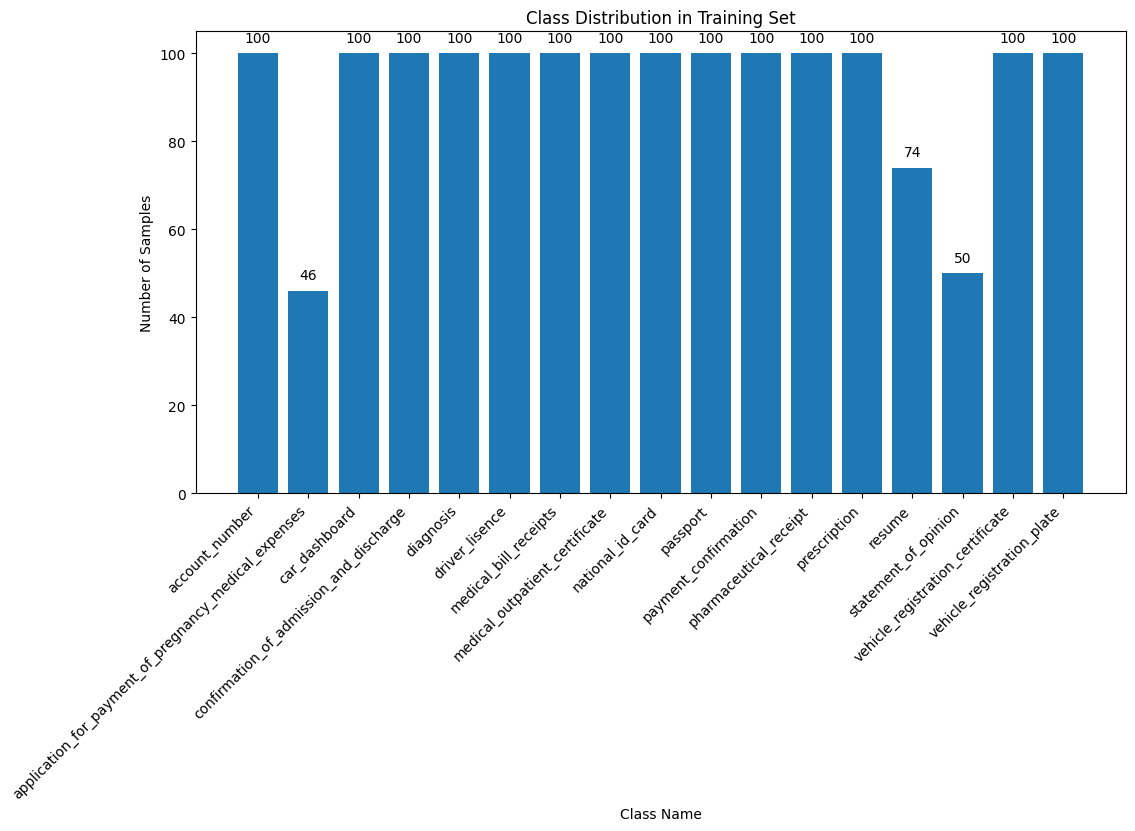

In [5]:
# 클래스 분포 계산
class_counts = train_df['target'].value_counts().sort_index()
class_names = meta_df.set_index('target')['class_name']

# 클래스 분포 시각화
plt.figure(figsize=(12, 6))
bars = plt.bar(class_names[class_counts.index], class_counts)

# 막대 위에 개수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, int(yval), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class Name')
plt.ylabel('Number of Samples')
plt.show()


### 클래스 분포 시각화

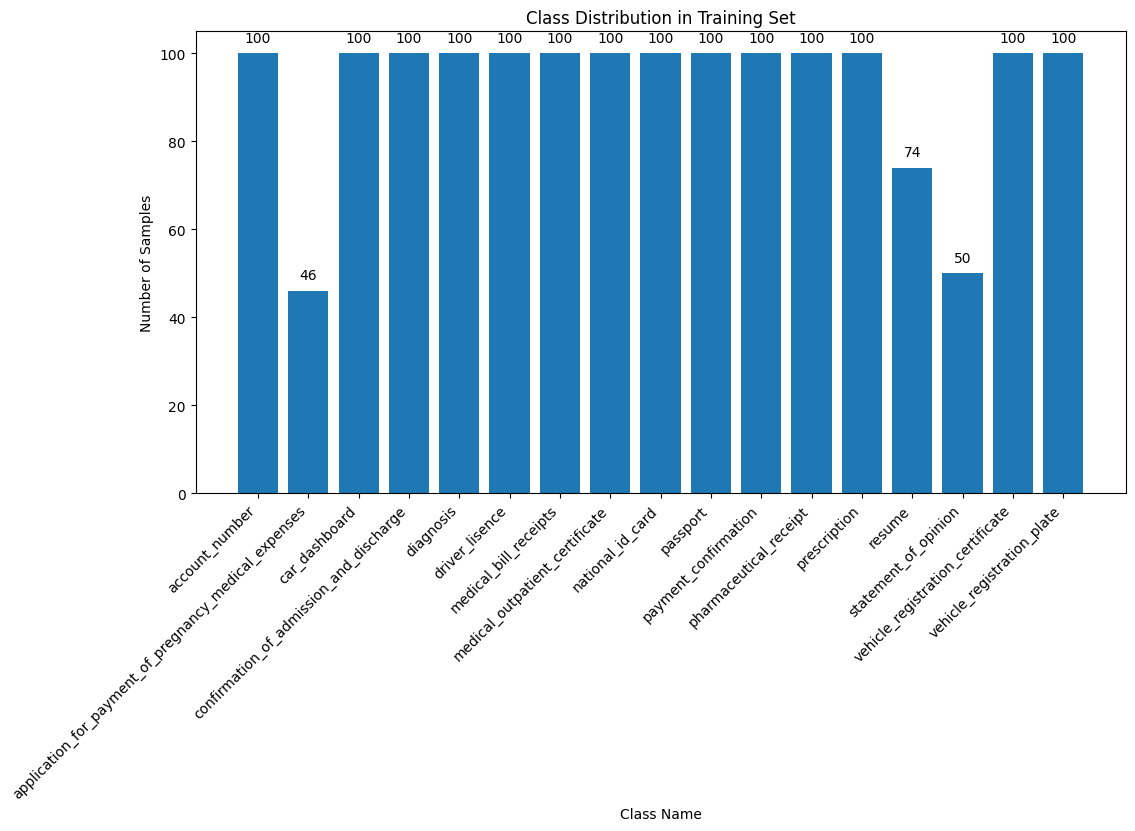

In [6]:
# 클래스 분포 계산
class_counts = train_df['target'].value_counts().sort_index()
class_names = meta_df.set_index('target')['class_name']

# 클래스 분포 시각화
plt.figure(figsize=(12, 6))
bars = plt.bar(class_names[class_counts.index], class_counts)

# 막대 위에 개수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, int(yval), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class Name')
plt.ylabel('Number of Samples')
plt.show()


### 파일 유효성 확인

In [7]:
# 파일 존재 여부 확인 함수
def check_file_existence(image_folder, file_ids):
    missing_files = []
    for file_id in file_ids:
        if not os.path.exists(os.path.join(image_folder, file_id)):
            missing_files.append(file_id)
    return missing_files

# Train/Test 데이터 누락 파일 확인
train_missing_files = check_file_existence(train_image_path, train_df['ID'])
test_missing_files = check_file_existence(test_image_path, sample_submission_df['ID'])

print(f"Train 데이터에서 누락된 파일 개수: {len(train_missing_files)}")
print(f"Test 데이터에서 누락된 파일 개수: {len(test_missing_files)}")


Train 데이터에서 누락된 파일 개수: 0
Test 데이터에서 누락된 파일 개수: 0


### 해상도 분포 확인

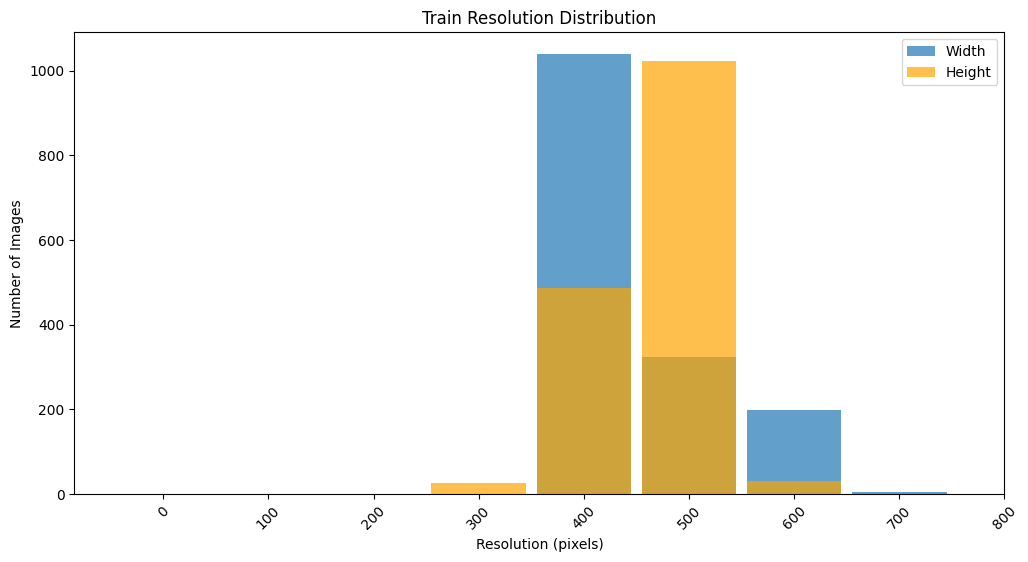

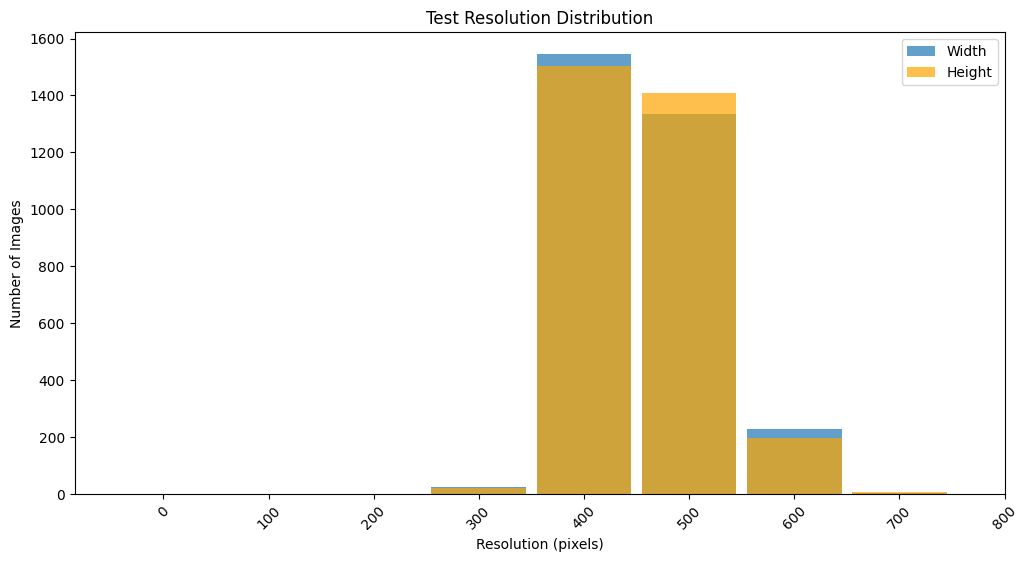

In [8]:
# 이미지 해상도 계산 함수
def check_image_resolutions(image_folder):
    resolutions = []
    for img_file in os.listdir(image_folder):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(image_folder, img_file)
            img = Image.open(img_path)
            resolutions.append(img.size)
    return resolutions

# 해상도 데이터 로드
train_resolutions = check_image_resolutions(train_image_path)
test_resolutions = check_image_resolutions(test_image_path)

# 해상도 분포 시각화 함수
def visualize_resolution_distribution(resolutions, dataset_name):
    widths, heights = zip(*resolutions)
    bins = np.arange(0, max(max(widths), max(heights)) + 100, 100)
    width_counts, _ = np.histogram(widths, bins=bins)
    height_counts, _ = np.histogram(heights, bins=bins)

    plt.figure(figsize=(12, 6))
    plt.bar(bins[:-1], width_counts, width=90, alpha=0.7, label="Width")
    plt.bar(bins[:-1], height_counts, width=90, alpha=0.7, label="Height", color='orange')
    plt.title(f"{dataset_name} Resolution Distribution")
    plt.xlabel("Resolution (pixels)")
    plt.ylabel("Number of Images")
    plt.xticks(bins, rotation=45)
    plt.legend()
    plt.show()

# 해상도 시각화 실행
visualize_resolution_distribution(train_resolutions, "Train")
visualize_resolution_distribution(test_resolutions, "Test")


### 픽셀 값 분포 확인

Train 데이터 픽셀 값 분포:


KeyboardInterrupt: 

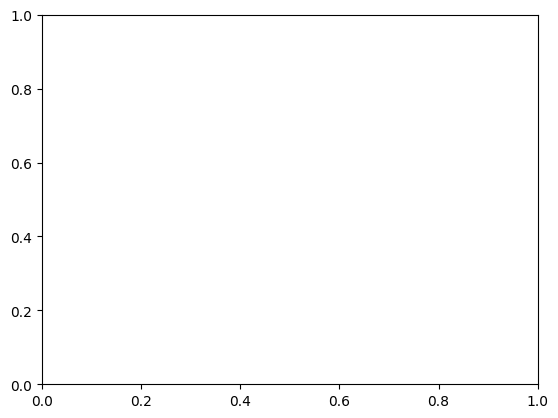

In [9]:
# 픽셀 값 분포 시각화 함수
def analyze_pixel_distribution(image_folder, sample_size=100):
    pixel_values = []
    sample_images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")][:sample_size]
    for img_file in sample_images:
        img = Image.open(os.path.join(image_folder, img_file)).convert("L")
        pixel_values.extend(list(img.getdata()))
    plt.hist(pixel_values, bins=50, color='gray', alpha=0.7)
    plt.title("Pixel Value Distribution")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()

# 픽셀 값 분포 확인
print("Train 데이터 픽셀 값 분포:")
analyze_pixel_distribution(train_image_path)

print("Test 데이터 픽셀 값 분포:")
analyze_pixel_distribution(test_image_path)


KeyboardInterrupt: 

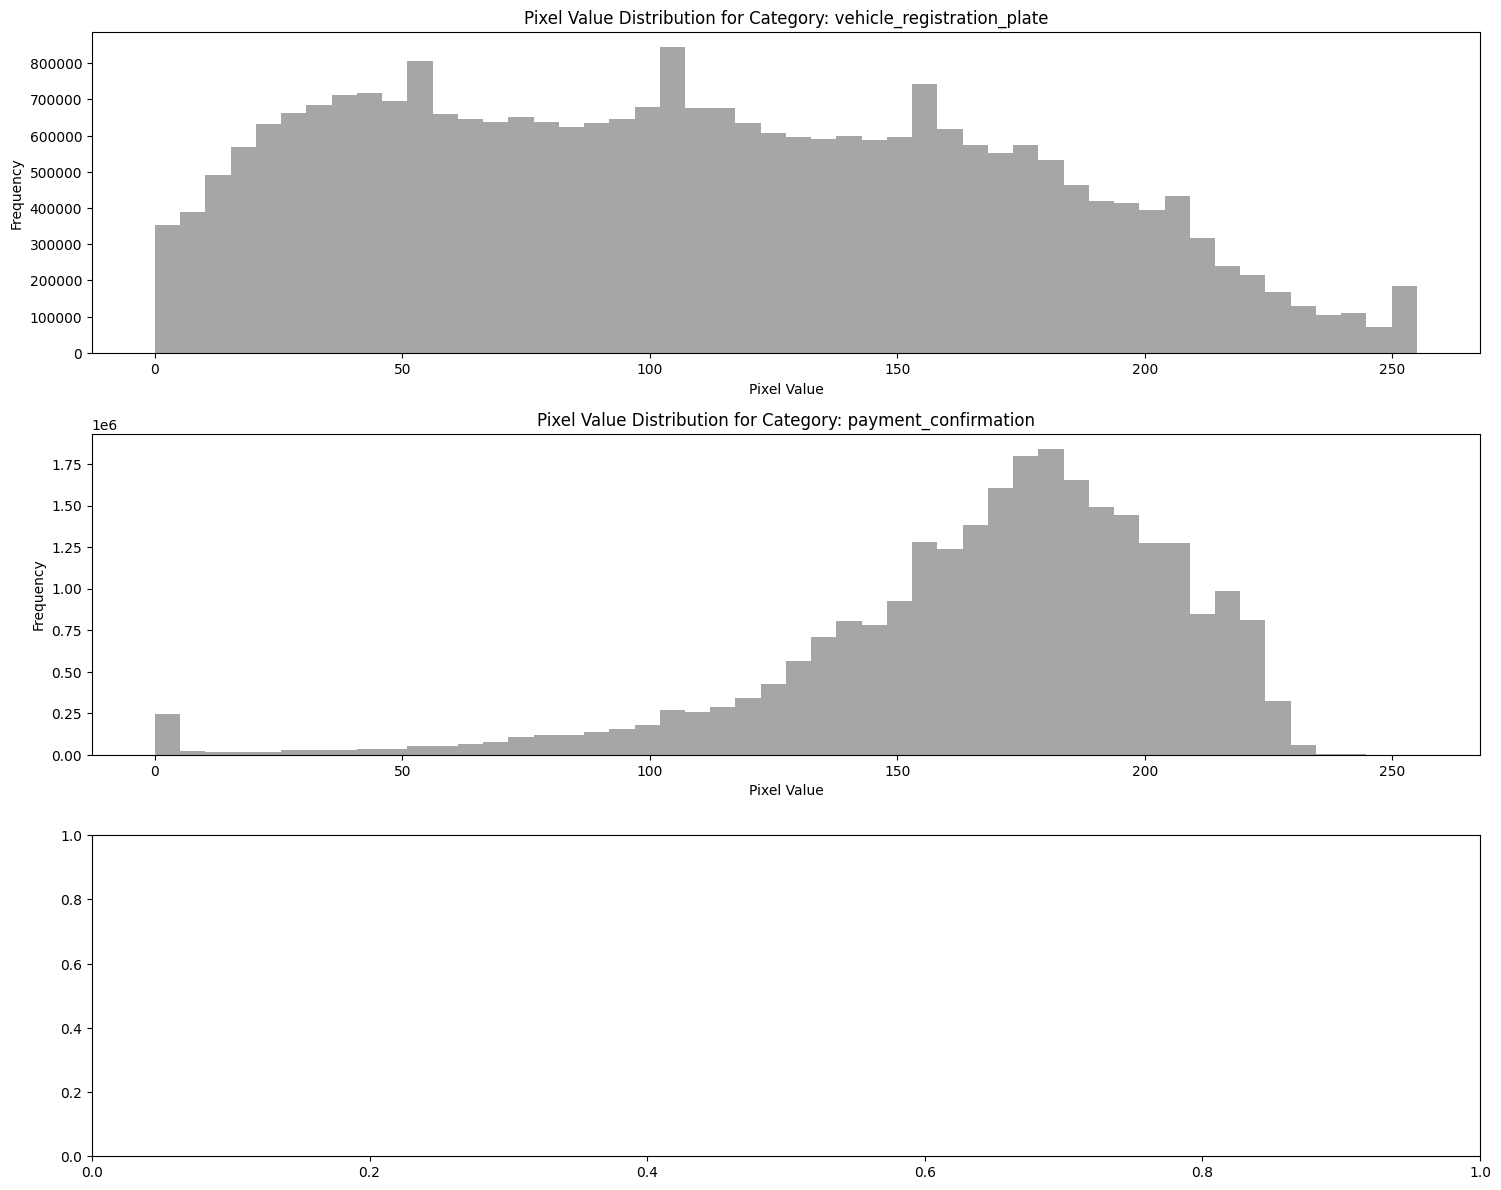

In [10]:
# 카테고리별 픽셀 값 분포 시각화 함수
def visualize_pixel_distribution_by_category(image_folder, train_with_meta, sample_size=100):
    unique_categories = train_with_meta['class_name'].unique()
    plt.figure(figsize=(15, len(unique_categories) * 4))
    
    for i, category in enumerate(unique_categories):
        category_images = train_with_meta[train_with_meta['class_name'] == category]['ID']
        pixel_values = []
        for img_file in category_images[:sample_size]:
            img_path = os.path.join(image_folder, img_file)
            img = Image.open(img_path).convert("L")
            pixel_values.extend(list(np.array(img).flatten()))

        plt.subplot(len(unique_categories), 1, i + 1)
        plt.hist(pixel_values, bins=50, color='gray', alpha=0.7)
        plt.title(f"Pixel Value Distribution for Category: {category}")
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")
        plt.tight_layout()

    plt.show()

# 카테고리별 시각화 실행
train_with_meta = train_df.merge(meta_df, on="target")
visualize_pixel_distribution_by_category(train_image_path, train_with_meta, sample_size=100)
